# Life Expectancy and GDP Project

Let's begin by importing the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('all_data.csv')

print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


Looking at the columns, let's investigate the following questions.

    1) What is each country's mean life expectancy and GDP? 

    2) How have each behaved over the years and why?

    3) Is a country's life expectancy correlated with its GDP?

    4) Which countries have improved or declined the most? 

    5) And which have remained stagnant?

Let's begin with the first question.

In [3]:
df.rename(columns={'Life expectancy at birth (years)': 'Life_Expectancy'},inplace=True)

countries=df['Country'].unique()

for country in countries:
    print('General statistics of '+country+ ' over the years:')
    print(df[df['Country']==country][['Life_Expectancy','GDP']].describe())
    print('\n')

General statistics of Chile over the years:
       Life_Expectancy           GDP
count        16.000000  1.600000e+01
mean         78.943750  1.697888e+11
std           1.058911  7.687884e+10
min          77.300000  6.973681e+10
25%          77.975000  9.387303e+10
50%          79.000000  1.729975e+11
75%          79.825000  2.449515e+11
max          80.500000  2.783840e+11


General statistics of China over the years:
       Life_Expectancy           GDP
count        16.000000  1.600000e+01
mean         74.262500  4.957714e+12
std           1.318016  3.501096e+12
min          71.700000  1.211350e+12
25%          73.400000  1.881585e+12
50%          74.450000  4.075195e+12
75%          75.250000  7.819550e+12
max          76.100000  1.106470e+13


General statistics of Germany over the years:
       Life_Expectancy           GDP
count         16.00000  1.600000e+01
mean          79.65625  3.094776e+12
std            0.97500  6.674862e+11
min           78.00000  1.949950e+12
25%        

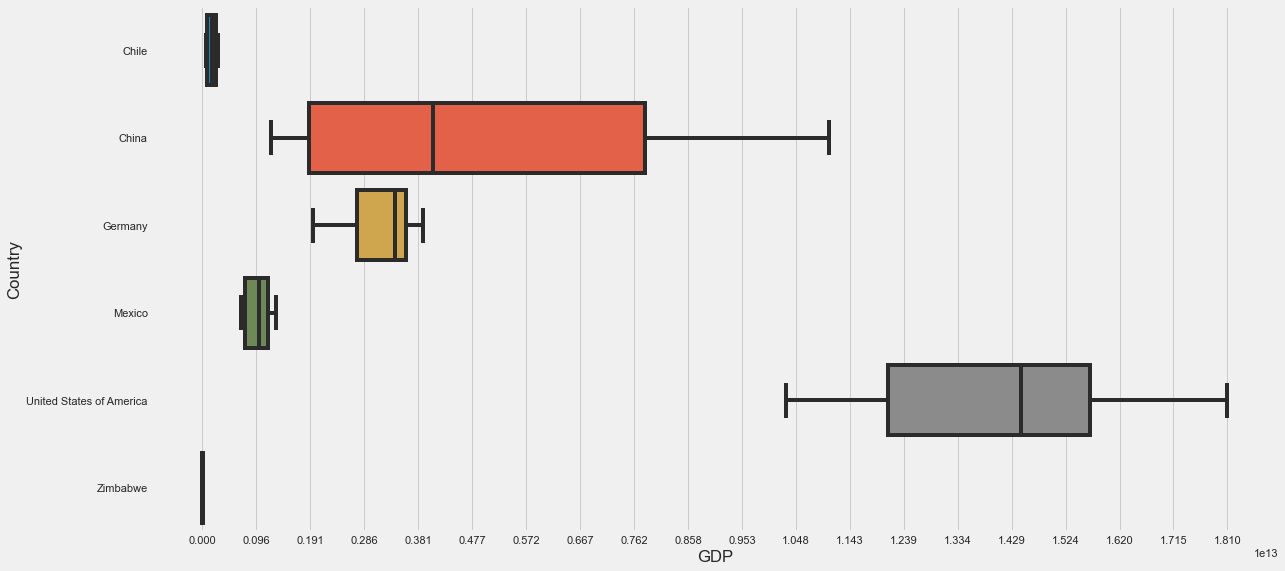

<Figure size 432x288 with 0 Axes>

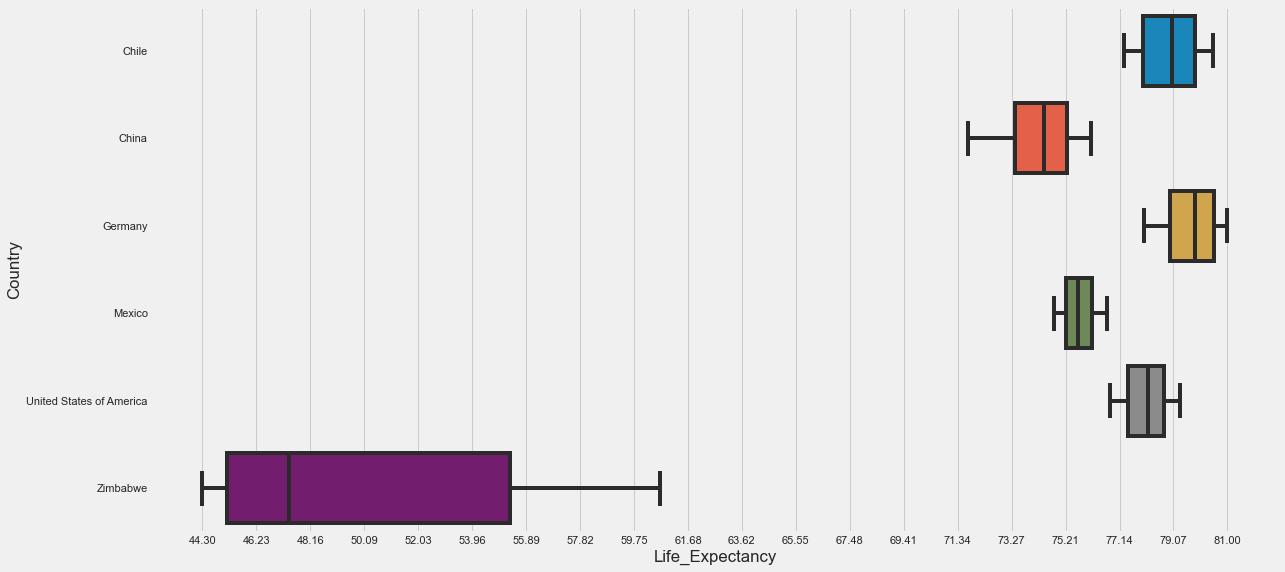

<Figure size 432x288 with 0 Axes>

In [18]:
plt.style.use('fivethirtyeight')
m=df['GDP'].min()
M=df['GDP'].max()
N=20

x_ticks=np.linspace(m,M,N)

fig1=plt.figure(figsize=(18,9))
ax1=plt.subplot()
sns.boxplot(data=df,x='GDP',y='Country')
ax1.set_xticks(x_ticks)
plt.show()
plt.clf()

m=df['Life_Expectancy'].min()
M=df['Life_Expectancy'].max()
N=20

x_ticks=np.linspace(m,M,20)


fig2=plt.figure(figsize=(18,9))
ax2=plt.subplot()
sns.boxplot(data=df,x='Life_Expectancy',y='Country')
ax2.set_xticks(x_ticks)
plt.show()
plt.clf()

From the boxplots above, we see that the United States has the highest mean GDP over the years, whilst China has the largest IQR. Additionally, we see that Zimbabwe's life Expectancy has an unusually large IQR, and that although Chile has the second highest mean life expectancy it has the second the second lowest mean GDP. Does this mean that GDP is not necessarily associated with life expectancy? Also, what could explain China's unusually large IQR for GDP and Zimbabwe's unsually large IQR for life expectancy?

Let's investigate further with some hypothesis testing.

In [11]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Chile_GDP=df[df['Country']=='Chile'].GDP
Chile_LifeExpec=df[df['Country']=='Chile'].Life_Expectancy

China_GDP=df[df['Country']=='China'].GDP
China_LifeExpec=df[df['Country']=='China'].Life_Expectancy

Germany_GDP=df[df['Country']=='Germany'].GDP
Germany_LifeExpec=df[df['Country']=='Germany'].Life_Expectancy

Mexico_GDP=df[df['Country']=='Mexico'].GDP
Mexico_LifeExpec=df[df['Country']=='Mexico'].Life_Expectancy

US_GDP=df[df['Country']=='United States of America'].GDP
US_LifeExpec=df[df['Country']=='United States of America'].Life_Expectancy

Zimbabwe_GDP=df[df['Country']=='Zimbabwe'].GDP
Zimbabwe_LifeExpec=df[df['Country']=='Zimbabwe'].Life_Expectancy

print('ANOVA results for GDP:')
print(f_oneway(Chile_GDP, China_GDP, Germany_GDP, Mexico_GDP, US_GDP, Zimbabwe_GDP))
print('\n')
print('Tukey results for GDP:')
print(pairwise_tukeyhsd(df['GDP'],df['Country'],0.05))
print('\n')
print('ANOVA results for life expectancy:')
print(f_oneway(Chile_LifeExpec, China_LifeExpec, Germany_LifeExpec, Mexico_LifeExpec, US_LifeExpec, Zimbabwe_LifeExpec))
print('\n')
print('Tukey results for life expectancy:')
print(pairwise_tukeyhsd(df['Life_Expectancy'],df['Country'],0.05))

ANOVA results for GDP:
F_onewayResult(statistic=146.9434779021769, pvalue=1.0177777153618003e-41)


Tukey results for GDP:
                                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                                    
         group1                   group2                meandiff      p-adj         lower               upper        reject
---------------------------------------------------------------------------------------------------------------------------
                   Chile                    China  4787924904984.6875  0.001   2971784703971.257   6604065105998.118   True
                   Chile                  Germany  2924986779984.6875  0.001  1108846578971.2566   4741126980998.118   True
                   Chile                   Mexico   806861779984.6875 0.7616 -1009278421028.7434   2623001980998.118  False
                   Chile United States of America  13905211154984.688  0.001  12089070953971.256   15721351355998.12   True
         

From the results of the ANOVA and Tukey tests above, we see that there's an all but certain statistically significant difference between every country's mean GDP and life expectancy. For GDP, we see that the only exceptions are the countries with the three lowest mean GDPs -- Chile, Zimbabwe, and Mexico. And for life expectancy, we see that the only exceptions are the countries with the four highest mean life expectancies -- Mexico, Germany, Chile, and the United States. Let's see this information visually with a few data visualizations. 

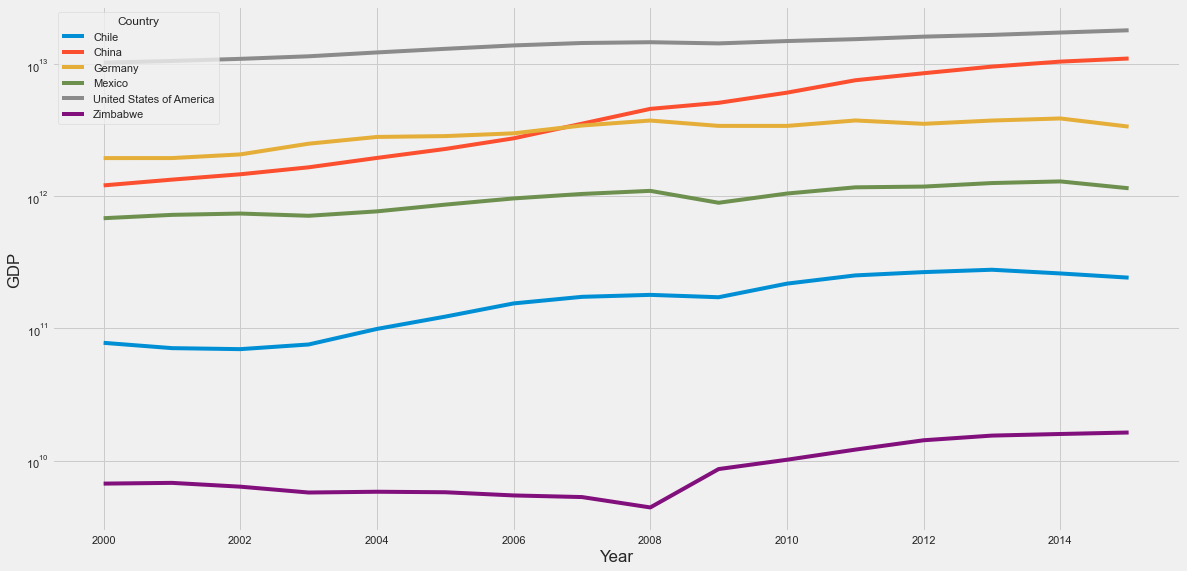

<Figure size 432x288 with 0 Axes>

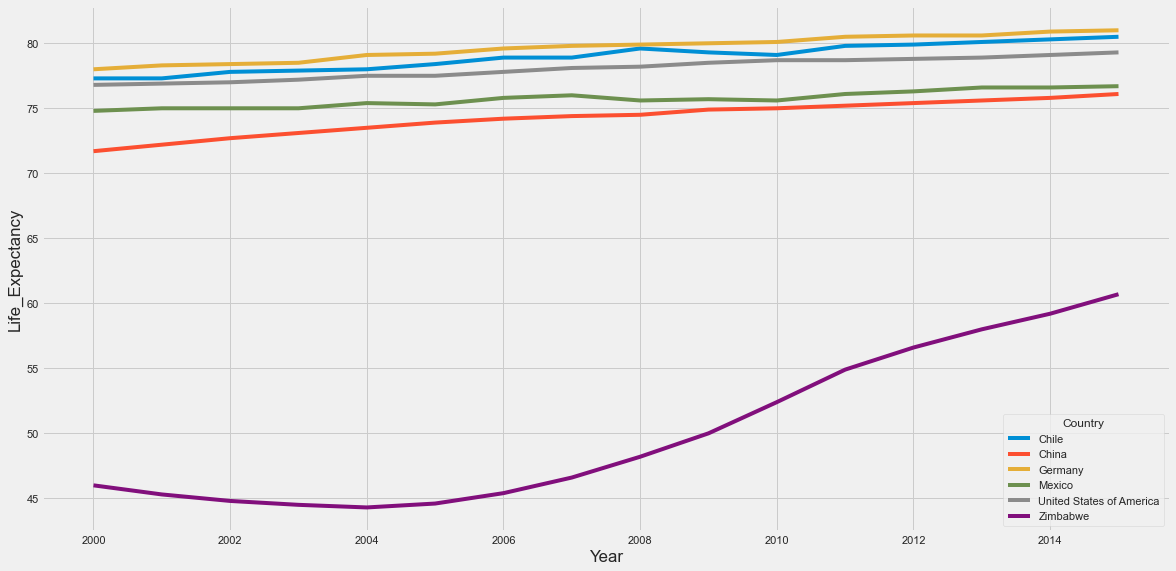

<Figure size 432x288 with 0 Axes>

In [49]:
fig1=plt.figure(figsize=(18,9))
ax1=plt.subplot()
sns.lineplot(data=df,x='Year',y='GDP',hue='Country')
ax1.set_yscale('log')
plt.show()
plt.clf()

fig2=plt.figure(figsize=(18,9))
sns.lineplot(data=df,x='Year',y='Life_Expectancy',hue='Country')
plt.show()
plt.clf()


Next let's see if a country's life expectancy is correlated with its GDP.

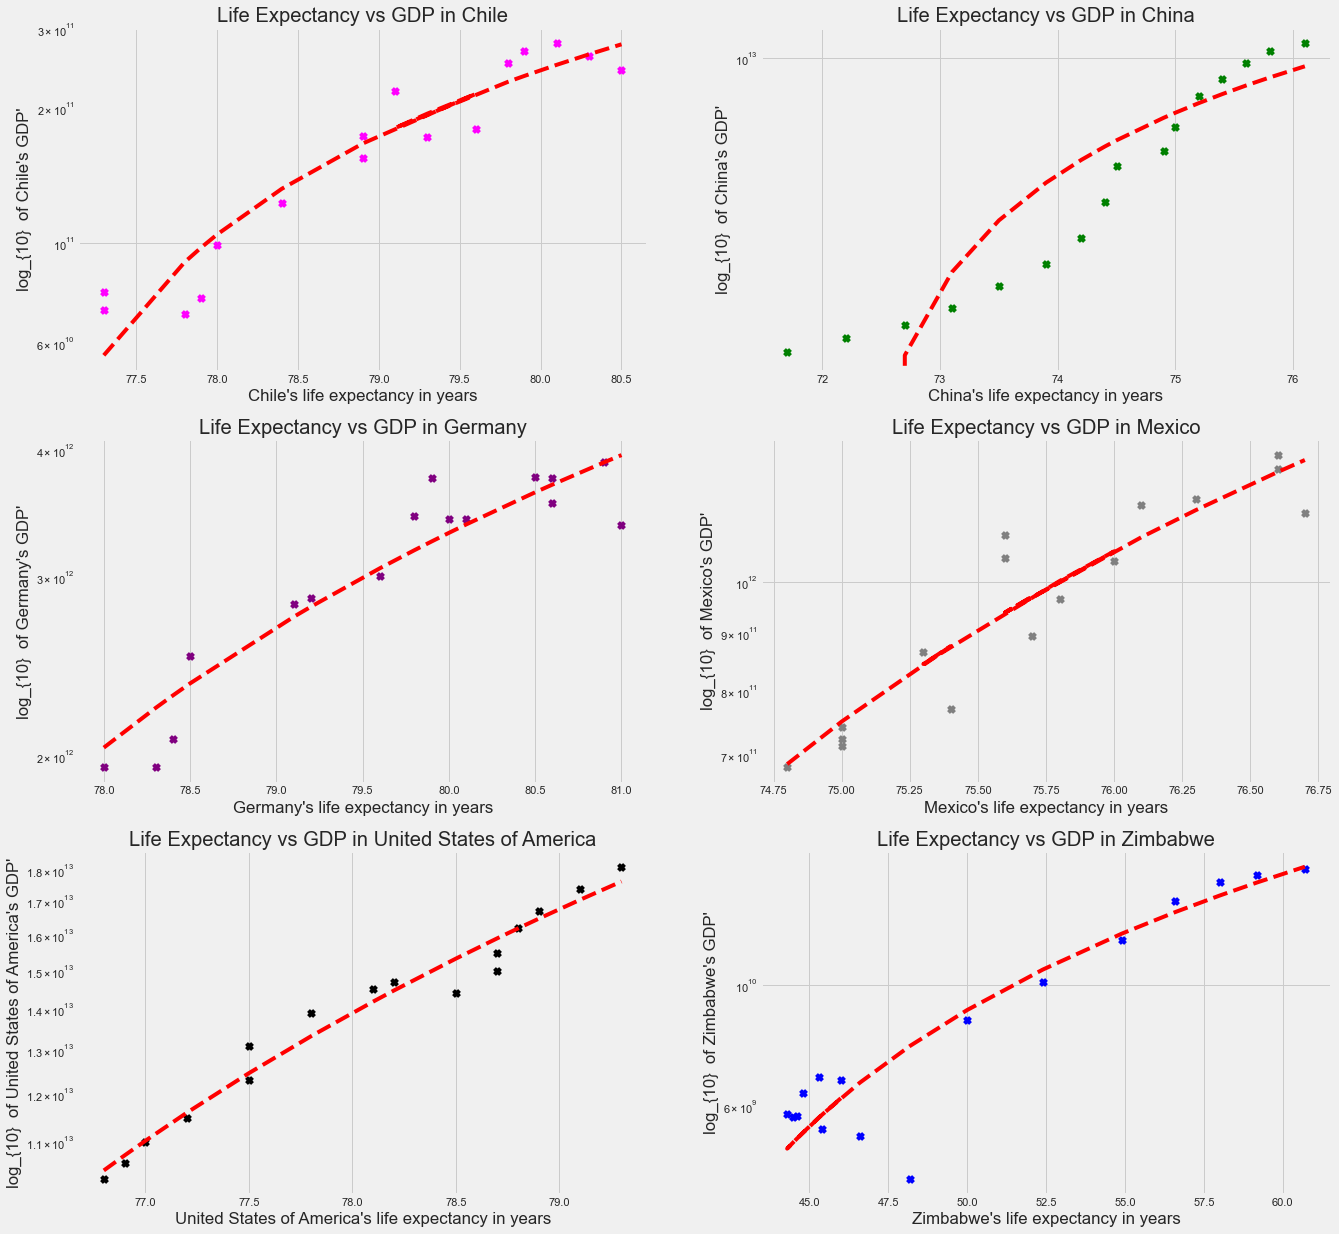

<Figure size 432x288 with 0 Axes>

In [76]:
countries=list(countries)
colors=['magenta','green','purple','grey','black','blue']

fig=plt.figure(figsize=(20,20))

for country in countries:
    i=countries.index(country)+1
    ax=plt.subplot(3,2,i,yscale='log')
    x=df[df['Country']==country].Life_Expectancy
    y=df[df['Country']==country].GDP
    m,b = np.polyfit(x,y,1)
    ax.scatter(x,y,c=colors[i-1],marker='x')
    ax.plot(x,m*x+b,c='red',linestyle='--')
    if country == 'United State of America':
        plt.title('Life Expectancy vs GDP '+'in the ' +country)
    else:
        plt.title('Life Expectancy vs GDP '+'in ' +country)
    plt.xlabel(country+"'s"+" life expectancy in years")
    plt.ylabel('log_{10} '+" of "+country+"'s GDP'")
    
plt.show()
plt.clf()


For every country, we see that there is a strong, positive correlation betweenn life expectancy and GDP. Below, let us calculate the correlation coefficient for each. 

In [77]:
for country in countries:
    s=df[df['Country']==country][['Life_Expectancy','GDP']].corr(method='pearson')
    c=s.loc['GDP','Life_Expectancy']
    print('The correlation coefficient between '+country+"'s life expectancy and GDP is: "+str(c))
    print('\n')

The correlation coefficient between Chile's life expectancy and GDP is: 0.9498766659254405


The correlation coefficient between China's life expectancy and GDP is: 0.9085255408648352


The correlation coefficient between Germany's life expectancy and GDP is: 0.9326988982561285


The correlation coefficient between Mexico's life expectancy and GDP is: 0.9322377167847088


The correlation coefficient between United States of America's life expectancy and GDP is: 0.9817092382430266


The correlation coefficient between Zimbabwe's life expectancy and GDP is: 0.9661998955858776




We see that all of them are very close to 1. 